In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.ticker import NullFormatter
import pandas as pd
import zipfile
import os

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
def feature_family():
    global df
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
    df['bySelf'] = df['FamilySize'].map(lambda s: 1 if s ==1 else 0)
    df['smallFam'] = df['FamilySize'].map(lambda s: 1 if 2 <=s <=4 else 0)
    df['largeFam'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    df.drop('SibSp', axis=1, inplace = True)
    df.drop('Parch', axis=1, inplace = True)
    return df

In [5]:
def feature_embarked():
    global df
    df.Embarked.fillna('S', inplace = True) #Median value fill
    embarked_dummies = pd.get_dummies(df['Embarked'], prefix = 'Embarked')
    df = pd.concat([df, embarked_dummies], axis = 1)
    df.drop('Embarked', axis=1, inplace = True)
    
    return df

In [6]:
def feature_cabin():
    global df
    df.Cabin.fillna('U', inplace = True) #unkown value fill
    df['Cabin'] = df['Cabin'].map(lambda c: c[0])
    cabin_dummies = pd.get_dummies(df['Cabin'], prefix = 'Cabin')
    df=pd.concat([df,cabin_dummies], axis = 1)
    df.drop('Cabin', axis = 1, inplace = True)
    
    return df

In [7]:
title = set()
for name in df['Name']:
    title.add(name.split(',')[1].split('.')[0].strip())

In [8]:
title_dict = {
    "Capt": "Crew",
    "Col": "Crew",
    "Dr": "Crew",
    "Major": "Crew",
    "Rev": "Crew",
    "Mr": "Mr",
    "Ms": "Ms",
    "Mrs": "Mr",
    "Miss": "Ms",
    "Mme": "Mrs",
    "Lady": "Royalty",
    "Jonkheer": "Royalty",
    "Sir": "Royalty",
    "Don": "Royalty",
    "Master": "Royalty",
    "Mlle": "Ms",
    "the Countess": "Royalty"    
    
}

def get_title():
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    df['Title'] = df.Title.map(title_dict)
    
    return df

In [9]:
def convert_name():
    global df
    df.drop('Name', axis=1, inplace = True)
    
    title_dummies = pd.get_dummies(df['Title'], prefix = 'Title')
    df = pd.concat([df, title_dummies], axis = 1)
    
    df.drop('Title', axis=1, inplace = True)
    
    return df

In [10]:
df = get_title()
mean = df['Age'].mean()
df['Age'].replace(np.nan ,mean, inplace=True)
df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
feature_embarked()
feature_cabin()
feature_family()
convert_name()
df.drop('Ticket', axis=1, inplace = True)
df.drop('PassengerId', axis=1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,...,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Mrs,Title_Ms,Title_Royalty
0,0,3,0,22.0,7.2500,0,0,1,0,0,...,1,2,0,1,0,0,1,0,0,0
1,1,1,1,38.0,71.2833,1,0,0,0,0,...,0,2,0,1,0,0,1,0,0,0
2,1,3,1,26.0,7.9250,0,0,1,0,0,...,1,1,1,0,0,0,0,0,1,0
3,1,1,1,35.0,53.1000,0,0,1,0,0,...,0,2,0,1,0,0,1,0,0,0
4,0,3,0,35.0,8.0500,0,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0


In [11]:
df['Pclass'].replace(0, 'noClass' , inplace = True)
df['Pclass'].replace(1, '1stClass' , inplace = True)
df['Pclass'].replace(2, '2ndClass' , inplace = True)
df['Pclass'].replace(3, '3rdClass' , inplace = True)
pclass_dummies = pd.get_dummies(df['Pclass'], prefix = 'Pclass')
df = pd.concat([df, pclass_dummies], axis = 1)
df.drop('Pclass', axis= 1, inplace = True)
df.head()

,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,...,smallFam,largeFam,Title_Crew,Title_Mr,Title_Mrs,Title_Ms,Title_Royalty,Pclass_1stClass,Pclass_2ndClass,Pclass_3rdClass
0,0,0,22.0,7.2500,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,1,26.0,7.9250,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,53.1000,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,0,0,35.0,8.0500,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()


,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Mrs,Title_Ms,Title_Royalty,Pclass_1stClass,Pclass_2ndClass,Pclass_3rdClass
0,0,0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0
2,1,1,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0
4,0,0,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1


In [13]:
mean1 = df['Fare'].mean()
df['Fare'].replace(np.nan ,mean1, inplace=True)
Features = df[['Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','Cabin_U','FamilySize','bySelf','smallFam','largeFam', 'Title_Crew', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Royalty','Pclass_1stClass', 'Pclass_2ndClass','Pclass_3rdClass']]

In [14]:
X = Features 
X[0:5]

,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Mrs,Title_Ms,Title_Royalty,Pclass_1stClass,Pclass_2ndClass,Pclass_3rdClass
0,0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0
4,0,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1


In [15]:
Y = df['Survived'].values
Y[0:5]

array([0, 1, 1, 1, 0])

In [16]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.73769513, -0.5924806 , -0.50244517, -0.48204268, -0.30756234,
         0.61583843, -0.13085598, -0.23598136, -0.26629582, -0.19611614,
        -0.19300938, -0.12168146, -0.06715343, -0.03352008,  0.54492498,
         0.05915988, -1.2316449 ,  1.4322604 , -0.2734756 , -0.14359163,
         0.62277642, -0.03352008, -0.5118981 , -0.2306328 , -0.56568542,
        -0.51015154,  0.90258736],
       [ 1.35557354,  0.63878901,  0.78684529,  2.0745051 , -0.30756234,
        -1.62380254, -0.13085598, -0.23598136,  3.75522235, -0.19611614,
        -0.19300938, -0.12168146, -0.06715343, -0.03352008, -1.835115  ,
         0.05915988, -1.2316449 ,  1.4322604 , -0.2734756 , -0.14359163,
         0.62277642, -0.03352008, -0.5118981 , -0.2306328 ,  1.76776695,
        -0.51015154, -1.10792599],
       [ 1.35557354, -0.2846632 , -0.48885426, -0.48204268, -0.30756234,
         0.61583843, -0.13085598, -0.23598136, -0.26629582, -0.19611614,
        -0.19300938, -0.12168146, -0.06715343, -0.0335

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,jaccard_similarity_score, f1_score
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.20, random_state = 10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 27) (712,)
Test set: (179, 27) (179,)


((652, 27), (652,), (60, 27), (60,))

In [18]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 180, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
RFC.fit(X_train,y_train)
RFC.score(X_train,y_train)

0.9002808988764045

In [19]:
from sklearn.metrics import accuracy_score
y_hat1 = RFC.predict(X_test)
accuracy_score(y_test, y_hat1)

0.8603351955307262

In [20]:
print (classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       117
           1       0.80      0.79      0.80        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



NameError: name 'rf_feat_importance' is not defined

Feature: 0, Score: 0.29853
Feature: 1, Score: 0.23780
Feature: 2, Score: 0.20027
Feature: 3, Score: 0.00834
Feature: 4, Score: 0.00564
Feature: 5, Score: 0.01906
Feature: 6, Score: 0.00192
Feature: 7, Score: 0.00402
Feature: 8, Score: 0.00811
Feature: 9, Score: 0.00928
Feature: 10, Score: 0.01177
Feature: 11, Score: 0.00070
Feature: 12, Score: 0.00138
Feature: 13, Score: 0.00035
Feature: 14, Score: 0.02292
Feature: 15, Score: 0.03299
Feature: 16, Score: 0.00706
Feature: 17, Score: 0.01680
Feature: 18, Score: 0.01072
Feature: 19, Score: 0.00175
Feature: 20, Score: 0.00692
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00274
Feature: 23, Score: 0.00467
Feature: 24, Score: 0.01123
Feature: 25, Score: 0.00405
Feature: 26, Score: 0.07099


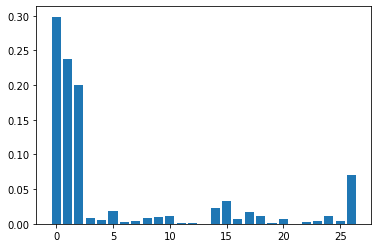

In [129]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x_train1, y_train1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
df.head() 

,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Mrs,Title_Ms,Title_Royalty,Pclass_1stClass,Pclass_2ndClass,Pclass_3rdClass
0,0,0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0
2,1,1,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0
4,0,0,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1


In [22]:
newFeatures = df[['Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_U','FamilySize','bySelf','smallFam','largeFam', 'Title_Crew', 'Title_Mr', 'Title_Ms', 'Title_Royalty','Pclass_1stClass', 'Pclass_2ndClass','Pclass_3rdClass']]
X1 = newFeatures
X1[0:5]

,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Ms,Title_Royalty,Pclass_1stClass,Pclass_2ndClass,Pclass_3rdClass
0,0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,1,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,2,0,1,0,0,1,0,0,1,0,0
4,0,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1


In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size = 0.2, random_state = 10)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (712, 25) (712,)
Test set: (179, 25) (179,)


In [25]:
RFC1 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, max_features = .5, n_jobs = -1)
RFC1.fit(X_train1,y_train1)
RFC1.score(X_train1,y_train1)

0.8946629213483146

In [26]:
from sklearn.metrics import accuracy_score
y_predict2 = RFC1.predict(X_test1)
accuracy_score(y_test1,y_predict2)

0.8603351955307262

In [27]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestRegressor()
# fit the model
model.fit(x_train2, y_train2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



NameError: name 'x_train2' is not defined

In [34]:
print (classification_report(y_valid2,y_predict2))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.91      0.87      0.89        23

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



In [28]:
df = pd.read_csv('test.csv')

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
mean = df['Age'].mean()
df['Age'].replace(np.nan ,mean, inplace=True)

In [30]:
df = get_title()
df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
feature_embarked()
feature_cabin()
feature_family()
convert_name()
df.drop('Ticket', axis=1, inplace = True)
df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Ms,Title_Royalty
0,892,3,0,34.5,7.8292,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0
1,893,3,1,47.0,7.0000,0,0,1,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0
2,894,2,0,62.0,9.6875,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0
3,895,3,0,27.0,8.6625,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0
4,896,3,1,22.0,12.2875,0,0,1,0,0,0,0,0,0,0,1,3,0,1,0,0,1,0,0


In [31]:
df['Pclass'].replace(0, 'noClass' , inplace = True)
df['Pclass'].replace(1, '1stClass' , inplace = True)
df['Pclass'].replace(2, '2ndClass' , inplace = True)
df['Pclass'].replace(3, '3rdClass' , inplace = True)
pclass_dummies = pd.get_dummies(df['Pclass'], prefix = 'Pclass')
df = pd.concat([df, pclass_dummies], axis = 1)
df.drop('Pclass', axis= 1, inplace = True)
df.head()

,PassengerId,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Ms,Title_Royalty,Pclass_1stClass,Pclass_2ndClass,Pclass_3rdClass
0,892,0,34.5,7.8292,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
1,893,1,47.0,7.0000,0,0,1,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,1
2,894,0,62.0,9.6875,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0
3,895,0,27.0,8.6625,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
4,896,1,22.0,12.2875,0,0,1,0,0,0,0,0,0,0,1,3,0,1,0,0,1,0,0,0,0,1


In [32]:
df.head()
mean1 = df['Fare'].mean()
df['Fare'].replace(np.nan ,mean1, inplace=True)

df.head()

,PassengerId,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Ms,Title_Royalty,Pclass_1stClass,Pclass_2ndClass,Pclass_3rdClass
0,892,0,34.5,7.8292,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
1,893,1,47.0,7.0000,0,0,1,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,1
2,894,0,62.0,9.6875,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0
3,895,0,27.0,8.6625,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
4,896,1,22.0,12.2875,0,0,1,0,0,0,0,0,0,0,1,3,0,1,0,0,1,0,0,0,0,1


In [33]:
newTestFeatures = df[['Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_U','FamilySize','bySelf','smallFam','largeFam', 'Title_Crew', 'Title_Mr', 'Title_Ms', 'Title_Royalty','Pclass_1stClass', 'Pclass_2ndClass','Pclass_3rdClass']]


In [34]:
X4 = newTestFeatures
X4[0:5]

,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,FamilySize,bySelf,smallFam,largeFam,Title_Crew,Title_Mr,Title_Ms,Title_Royalty,Pclass_1stClass,Pclass_2ndClass,Pclass_3rdClass
0,0,34.5,7.8292,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
1,1,47.0,7.0000,0,0,1,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,1
2,0,62.0,9.6875,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0
3,0,27.0,8.6625,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
4,1,22.0,12.2875,0,0,1,0,0,0,0,0,0,0,1,3,0,1,0,0,1,0,0,0,0,1


In [35]:
Y4 = df['PassengerId'].values
Y4[0:5]

array([892, 893, 894, 895, 896])

In [37]:
RFC1.fit(X_train1,y_train1)
ynew = RFC1.predict(X4)
df1 = pd.DataFrame(ynew)
df1.columns = ['Survived']
df1.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [38]:
df2 = pd.DataFrame(Y4)
Y4[0:5]
df2.columns =['PassengerId']
df2.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [39]:
df3 = pd.concat([df2, df1], axis = 1)
df3.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [50]:
df3.reset_index(drop=True, inplace=True)
df3.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
df3.to_csv('Titanic_Predictions7.csv')